In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive/machine-learning/projects/online-shopping

linear-regression-project.csv


In [ ]:
%cd drive/My\ Drive/machine-learning/projects/online-shopping

/content/drive/My Drive/machine-learning/projects/online-shopping


#### If you are using Google colab, then only will you need to run the above 3 cells, and change the path accordingly, else you can start your code from here

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('./linear-regression-project.csv')

In [ ]:
data.head(15)

,Email,Address,Username,Avg. Session Length,Time on App,Time on Website,Membership Length,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Membership Length,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Email                500 non-null    object 
 1   Address              500 non-null    object 
 2   Username             500 non-null    object 
 3   Avg. Session Length  500 non-null    float64
 4   Time on App          500 non-null    float64
 5   Time on Website      500 non-null    float64
 6   Membership Length    500 non-null    float64
 7   Yearly Amount Spent  500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


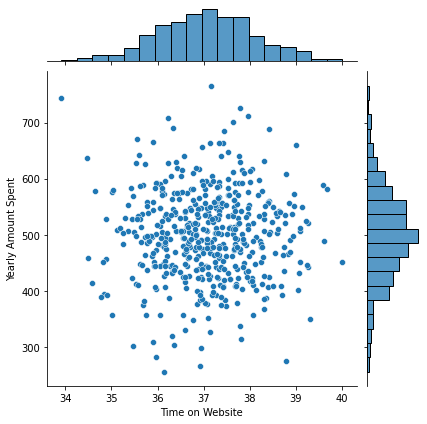

In [ ]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=data)

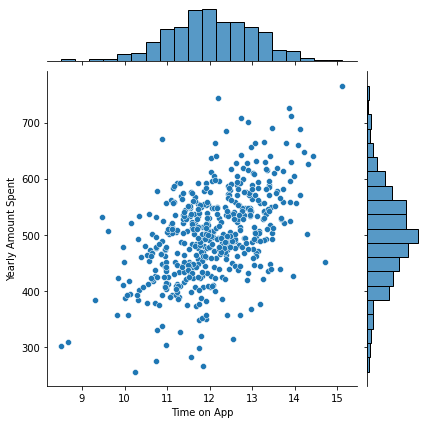

In [ ]:
sns.jointplot(x='Time on App', y ='Yearly Amount Spent', data = data)

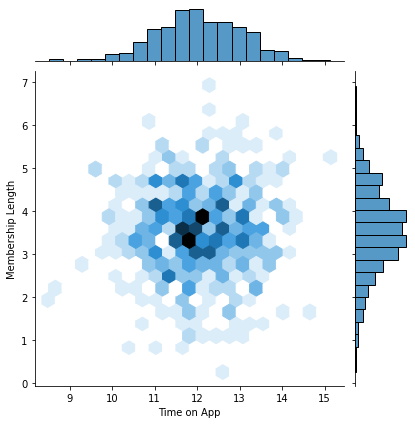

In [ ]:
sns.jointplot(x='Time on App', y='Membership Length', data = data, kind = 'hex')

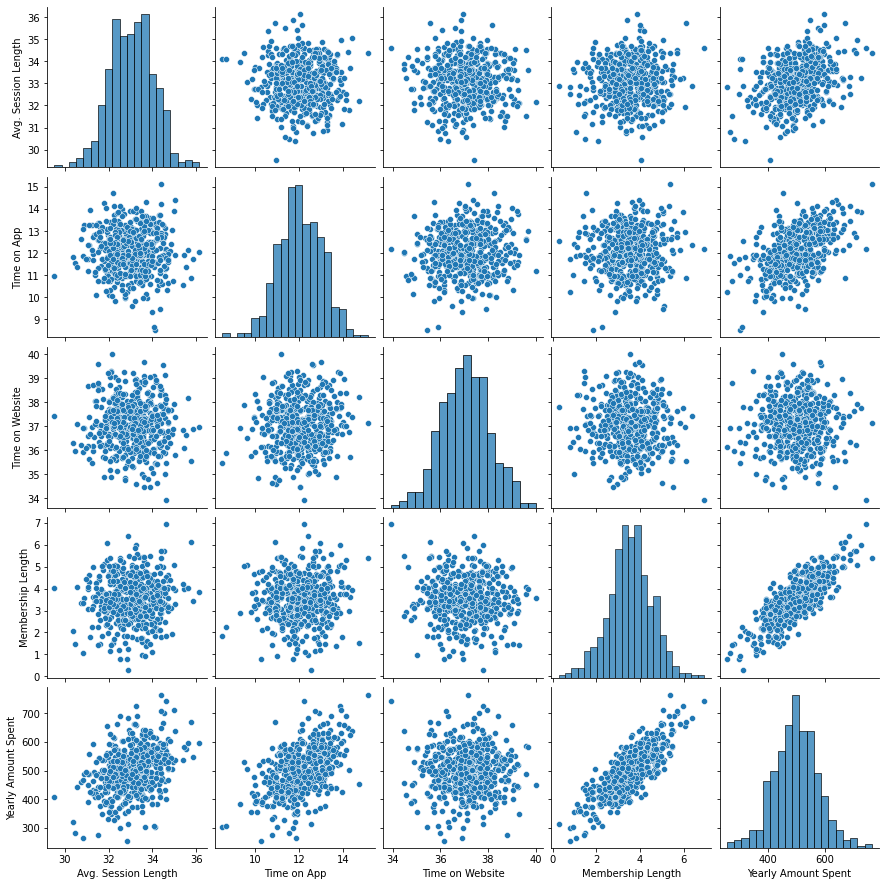

In [ ]:
sns.pairplot(data)

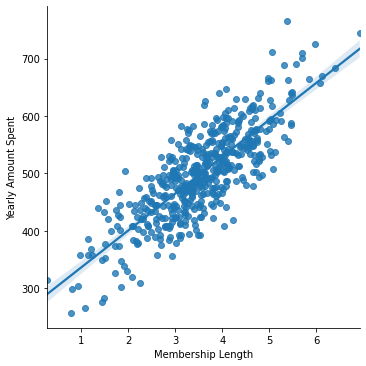

In [ ]:
sns.lmplot(x='Membership Length', y='Yearly Amount Spent', data=data)

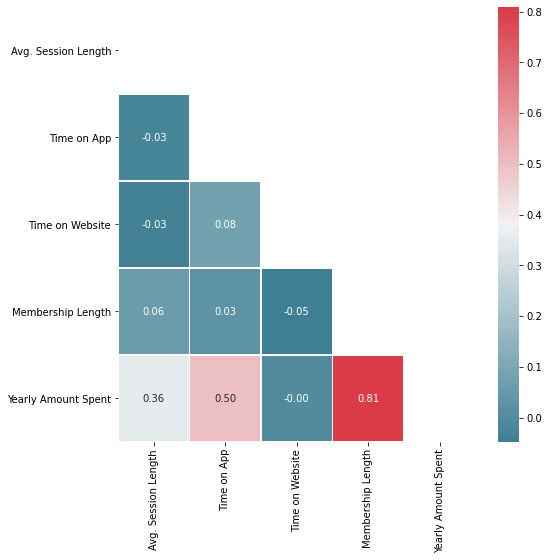

In [ ]:
import numpy as np
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
data.columns

Index(['Email', 'Address', 'Username', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Membership Length', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
data = data.drop(['Email', 'Address', 'Username'], axis = 1) 

In [ ]:
x = data.drop(['Yearly Amount Spent'], axis=1)
y = data['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
list(zip(list(x), model.coef_))

[('Avg. Session Length', 25.603623754734123),
 ('Time on App', 38.716160530832504),
 ('Time on Website', 0.46733489830680186),
 ('Membership Length', 61.61462456976476)]

In [ ]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coefficient'])

,Coefficient
Avg. Session Length,25.603624
Time on App,38.716161
Time on Website,0.467335
Membership Length,61.614625


In [ ]:
model.intercept_

-1048.5769343028974

In [ ]:
predictions = model.predict(x_test)

Text(0, 0.5, 'Predicted Y')

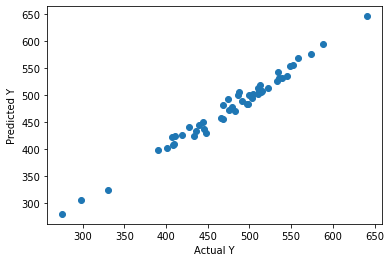

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions))

Mean Absolute Error:  7.760679660355712


In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test,predictions))

Mean Squared Error:  84.0433169658843


In [ ]:
print("Model score: ", r2_score(y_test,predictions))

Model score:  0.9822065535782731


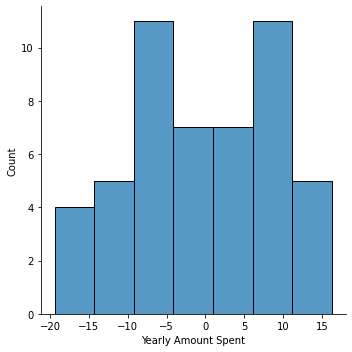

In [ ]:
sns.displot(y_test-predictions)